Available stocks:
AAPL: Apple Inc.
TSLA: Tesla Inc.
MSFT: Microsoft Corporation
GOOGL: Alphabet Inc. (Google)
AMZN: Amazon.com Inc.
META: Meta Platforms Inc.
NVDA: NVIDIA Corporation
Enter stock symbol (e.g., AAPL, TSLA): NVDA
Choose model (LR for Linear Regression / RF for Random Forest): LR


/tmp/ipython-input-1235579569.py:35: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2023-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed



Model Performance:
MSE: 0.9331794456118186
R² Score: 0.8889268469346437


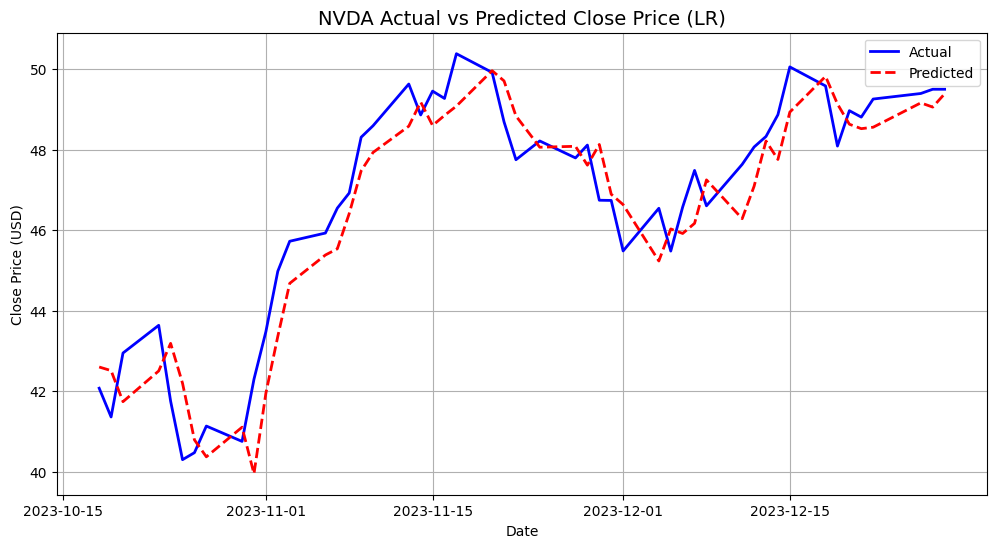

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------
# 1. Select stock and model
# -------------------------

# List of popular stocks
stocks = {
    "AAPL": "Apple Inc.",
    "TSLA": "Tesla Inc.",
    "MSFT": "Microsoft Corporation",
    "GOOGL": "Alphabet Inc. (Google)",
    "AMZN": "Amazon.com Inc.",
    "META": "Meta Platforms Inc.",
    "NVDA": "NVIDIA Corporation"
}

# Display stock list
print("Available stocks:")
for symbol, name in stocks.items():
    print(f"{symbol}: {name}")

stock_symbol = input("Enter stock symbol (e.g., AAPL, TSLA): ").upper()
model_choice = input("Choose model (LR for Linear Regression / RF for Random Forest): ").upper()

# -------------------------
# 2. Download stock data
# -------------------------
data = yf.download(stock_symbol, start='2023-01-01', end='2023-12-31')

# -------------------------
# 3. Prepare features and target
# -------------------------
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Shift target to predict next day's Close
y = y.shift(-1).dropna()
X = X.iloc[:-1, :]

# -------------------------
# 4. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------
# 5. Train model
# -------------------------
if model_choice == "RF":
    model = RandomForestRegressor(n_estimators=100, random_state=42)
else:
    model = LinearRegression()

model.fit(X_train, y_train)

# -------------------------
# 6. Predictions
# -------------------------
y_pred = model.predict(X_test)

# -------------------------
# 7. Evaluation
# -------------------------
print("\nModel Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# If Random Forest, show feature importance
if model_choice == "RF":
    importance = pd.Series(model.feature_importances_, index=X.columns)
    print("\nFeature Importance:")
    print(importance.sort_values(ascending=False))

# -------------------------
# 8. Plot actual vs predicted
# -------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title(f"{stock_symbol} Actual vs Predicted Close Price ({model_choice})", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

